MNIST
8계층 구조 
입력 32 X 32 필기체 숫자 영상
풀링 가중티X2X2 블록의 합 X 편차합
시그모이드 활성화 함수 사용
성능 오창율 0.95% (정확도 95.25%)


모듈 인포트

In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.datasets import mnist
import numpy as np

데이터 로드 및 전처리

In [9]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()


In [20]:


import tensorflow.compat.v2 as tf

import tensorflow_datasets as tfds

In [21]:


# tfds works in both Eager and Graph modes

tf.enable_v2_behavior()

In [23]:
cifar_builder = tfds.builder("cifar100")

cifar_builder.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar100/3.0.2.incomplete4FJPZK/cifar100-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cifar100/3.0.2.incomplete4FJPZK/cifar100-test.tfrecord*...:   0%|          | 0…

Dataset cifar100 downloaded and prepared to ~/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


In [25]:

print(cifar_builder.info)




tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='~/tensorflow_datasets/cifar100/3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=tf.int64, num_classes=20),
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=100),
    }),
    supervised_keys=('image', 'label'),
    dis

In [26]:

# label naems

print(cifar_builder.info.features["label"].names)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [27]:


print(cifar_builder.info.features["coarse_label"].names)

['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


In [29]:


# Train/ Validation Datasets

train_cifar_dataset = cifar_builder.as_dataset(split=tfds.Split.TRAIN)

val_cifar_dataset = cifar_builder.as_dataset(split=tfds.Split.TEST)

In [30]:
print(train_cifar_dataset)
print(val_cifar_dataset)

num_classes = cifar_builder.info.features['label'].num_classes

# Number of images: train 50,000 .  validation 10,000

num_train_imgs = cifar_builder.info.splits['train'].num_examples

num_val_imgs = cifar_builder.info.splits['test'].num_examples



print("Training dataset instance:", train_cifar_dataset)


<PrefetchDataset element_spec={'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
<PrefetchDataset element_spec={'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Training dataset instance: <PrefetchDataset element_spec={'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [31]:
import math



input_shape = [224, 224, 3]

batch_size = 32

num_epochs = 30


train_cifar_dataset = train_cifar_dataset.repeat(num_epochs).shuffle(10000)

 

def _prepare_data_fn(features, input_shape, augment=False):

    """

    Resize image to expected dimensions, and opt. apply some random transformations.

    - param features: Data

    - param input_shape: Shape expected by the models (images will be resized accordingly)

    - param augment: Flag to apply some random augmentations to the images

    - return: Augmented Images, Labels

    """

    input_shape = tf.convert_to_tensor(input_shape)

    

    # Tensorflow-dataset returns batches as feature dictionaries, expected by Estimators. 

    # To train Keras models, it is mor straightforward to return the batch content as tuples. 

    image = features['image']

    label = features['label']

    

    # Convert the images to float type, also scaling their values from [0, 255] to [0., 1.]

    image = tf.image.convert_image_dtype(image, tf.float32)

    

    if augment:

        # Randomly applied horizontal flip

        image = tf.image.random_flip_left_right(image)

        

        # Random B/S changes

        image = tf.image.random_brightness(image, max_delta=0.1)

        image = tf.image.random_saturation(image, lower=0.5, upper=1.5) # RGB 이미지의 채도를 임의의 요소로 조정

        image = tf.clip_by_value(image, 0.0, 1.0) # keeping pixel values in check 
        # tf.clip_by_value : tensor의 최대값과 최소값 사이로 자르는 역할을 함.

        

        # random resize and random crop back to expected size

        random_scale_factor = tf.random.uniform([1], minval=1., maxval=1.4, dtype=tf.float32) # 균일분포 난수를 발생

        scaled_height = tf.cast(tf.cast(input_shape[0], tf.float32) * random_scale_factor, tf.int32) # tf.cast는 배열의 dtype을 변경

        scaled_width = tf.cast(tf.cast(input_shape[1], tf.float32) * random_scale_factor, tf.int32)

        

        scaled_shape = tf.squeeze(tf.stack([scaled_height, scaled_width]))
        # squeeze는 차원 중 사이즈가 1인 것을 찾아 스칼라값으로 바꿔 해당 차원을 제거한다.

        image = tf.image.resize(image, scaled_shape)

        image = tf.image.random_crop(image, input_shape) 
        # tf.image.random_crop : 주어진 크기로 텐서를 무작위로 자릅니다.

    else:

        image = tf.image.resize(image, input_shape[:2])

        

    return image, label





import functools



prepare_data_fn_for_train = functools.partial(_prepare_data_fn, 

                                              input_shape=input_shape,

                                              augment=True)

# partial을 사용하여 인자가 여러 개인 함수에 몇 개의 인자가 이미 설정되어있는 새로운 함수를 생성할 수 있다

train_cifar_dataset = train_cifar_dataset.map(prepare_data_fn_for_train, num_parallel_calls=4)





# batch the samples

train_cifar_dataset = train_cifar_dataset.batch(batch_size)

train_cifar_dataset = train_cifar_dataset.prefetch(1)





# validation dataset (not shuffling or augmenting it)

prepare_data_fn_for_val = functools.partial(_prepare_data_fn,

                                           input_shape=input_shape,

                                           augment=False)



val_cifar_dataset = (val_cifar_dataset

                     .repeat()

                    .map(prepare_data_fn_for_val, num_parallel_calls=4)

                    .batch(batch_size)

                    .prefetch(1))





train_steps_per_epoch = math.ceil(num_train_imgs / batch_size)

val_steps_per_epoch = math.ceil(num_val_imgs / batch_size)



https://doubly8f.netlify.app/%EA%B0%9C%EB%B0%9C/2020/08/19/tf-loading-preprocessing-data/
Tensorflow 데이터 로딩 및 전처리 파이프라인 구현하기

https://tempdev.tistory.com/36

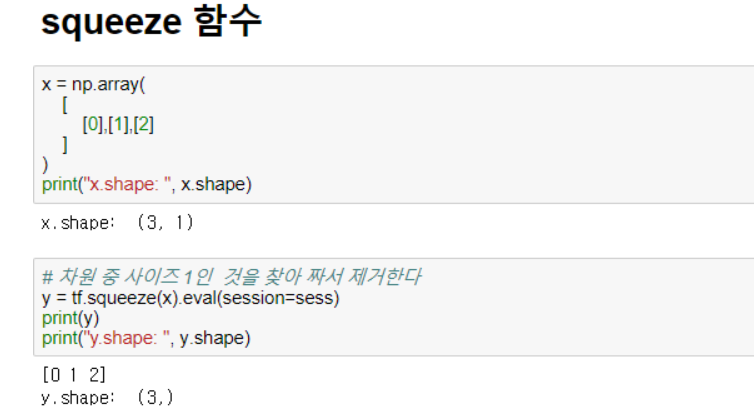

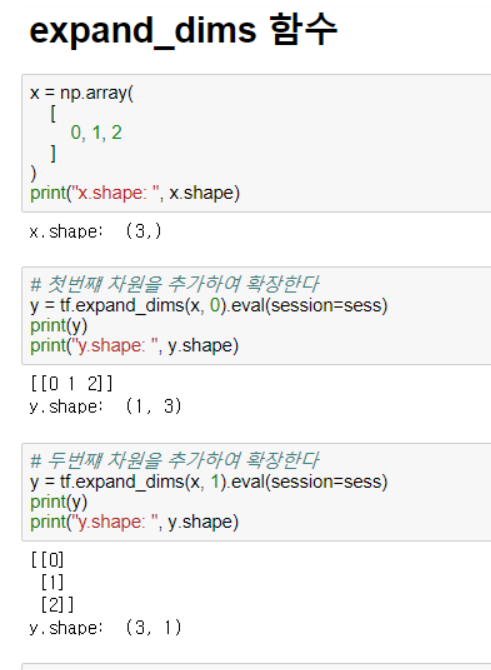

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #데이터 정규화

print("x_train:", len(x_train), "x_test:", len(x_test))

169001437/169001437 [==============================] - 3s 0us/step
x_train: 50000 x_test: 10000


In [33]:
img_input = keras.Input(shape=(32, 32, 3))

#Convolution Neural Network 분류기 model 구조

In [ ]:
print(img_input)

In [34]:

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

In [35]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 45s 28ms/step - loss: 3.6419 - accuracy: 0.1510


In [36]:
# 첫 번째 블록
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

In [37]:
# 두 번째 블록
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv1')(x)
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

In [38]:
# 세 번째 블록
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv1')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv2')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3pool')(x)

In [39]:
# 네 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4pool')(x)

In [40]:
# 다섯 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5pool')(x)
# 여섯 번째 블록
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x)    # CIFAR100을 위한 모델 Out

In [41]:
model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2conv1 (Conv2D)        (None, 16, 16, 128)       73856     
                                                                 
 block2conv2 (Conv2D)        (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0    

In [ ]:
#추가로 import해야 할 패키지들 먼저 가져오기
from tensorflow.keras import backend, regularizers, initializers, models

#block 안에 반복적으로 활용되는 L2 regularizer를 선언해 준다.
def _gen_l2_regularizer(use_l2_regularizer =True, l2_weight_decay = 1e-4):
    return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
  """A block that has a conv layer at shortcut.
  Note that from stage 3,
  the second conv layer at main path is with strides=(2, 2)
  And the shortcut should have strides=(2, 2) as well
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    strides: Strides for the second conv layer in the block.
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  shortcut = layers.Conv2D(
      filters3, (1, 1),
      strides=strides,
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '1')(
          input_tensor)
  shortcut = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '1')(
          shortcut)

  x = layers.add([x, shortcut])
  x = layers.Activation('relu')(x)
  return x
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   batch_norm_decay=0.9,
                   batch_norm_epsilon=1e-5):
  """The identity block is the block that has no conv layer at shortcut.
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  x = layers.add([x, input_tensor])
  x = layers.Activation('relu')(x)
  return x

In [ ]:
def resnet50(num_classes,
             batch_size=None,
             use_l2_regularizer=True,
             rescale_inputs=False,
             batch_norm_decay=0.9,
             batch_norm_epsilon=1e-5):
  """Instantiates the ResNet50 architecture.
  Args:
    num_classes: `int` number of classes for image classification.
    batch_size: Size of the batches for each step.
    use_l2_regularizer: whether to use L2 regularizer on Conv/Dense layer.
    rescale_inputs: whether to rescale inputs from 0 to 1.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
      A Keras model instance.
  """

  input_shape = (32, 32, 3)  # CIFAR100을 위한 input_shape 조정입니다. 
  img_input = layers.Input(shape=input_shape, batch_size=batch_size)
  if rescale_inputs:
    # Hub image modules expect inputs in the range [0, 1]. This rescales these
    # inputs to the range expected by the trained model.
    x = layers.Lambda(
        lambda x: x * 255.0 - backend.constant(
            imagenet_preprocessing.CHANNEL_MEANS,
            shape=[1, 1, 3],
            dtype=x.dtype),
        name='rescale')(
            img_input)
  else:
    x = img_input

  if backend.image_data_format() == 'channels_first':
    x = layers.Permute((3, 1, 2))(x)
    bn_axis = 1
  else:  # channels_last
    bn_axis = 3

  block_config = dict(
      use_l2_regularizer=use_l2_regularizer,
      batch_norm_decay=batch_norm_decay,
      batch_norm_epsilon=batch_norm_epsilon)
  x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
  x = layers.Conv2D(
      64, (7, 7),
      strides=(2, 2),
      padding='valid',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='conv1')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name='bn_conv1')(
          x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

  x = conv_block(
      x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1), **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='b', **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='c', **block_config)

  x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='b', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='c', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='d', **block_config)

  x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f', **block_config)

  x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c', **block_config)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(
      num_classes,
      kernel_initializer=initializers.RandomNormal(stddev=0.01),
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='fc1000')(
          x)

  # A softmax that is followed by the model loss must be done cannot be done
  # in float16 due to numeric issues. So we pass dtype=float32.
  x = layers.Activation('softmax', dtype='float32')(x)

  # Create model.
  return models.Model(img_input, x, name='resnet50')

In [ ]:
model = resnet50(num_classes = 100)

model.summary()

In [ ]:
 #모델 학습
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 1) #1 eppoch만 학습한다.